<a href="https://colab.research.google.com/github/WojciechSokolowski/Qiskit_Projects/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
!pip install qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit_aer


In [ ]:
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram
import numpy as np
import matplotlib.pyplot as plt
import math

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

from qiskit.circuit.library import MCMT
from qiskit.circuit.library import GroverOperator
from qiskit.quantum_info import Statevector, DensityMatrix, Operator

# Searching for |101⟩

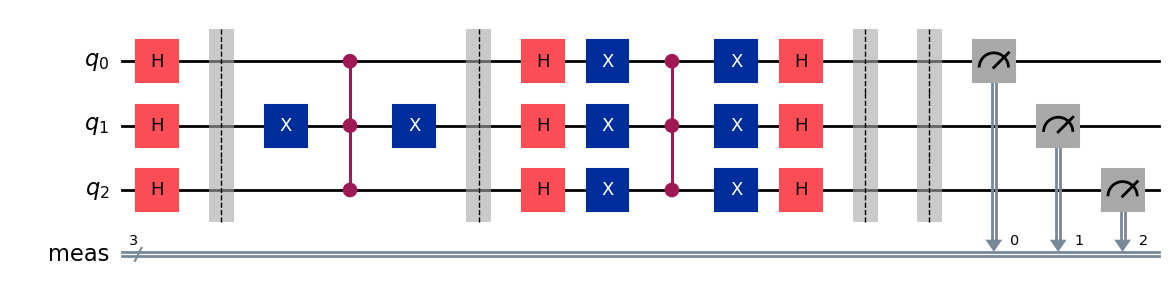

In [ ]:
f = QuantumCircuit(3)
f.h(range(3))
f.barrier()

# oraclestats[max(stats, key=stats.get)]

f.x(1)

f.ccz(2,1,0)

f.x(1)


f.barrier()
#amplifier
f.h(range(3))
f.x(range(3))

f.ccz(2,1,0)

f.x(range(3))
f.h(range(3))

f.barrier()

f.measure_all()
display(f.draw('mpl'))


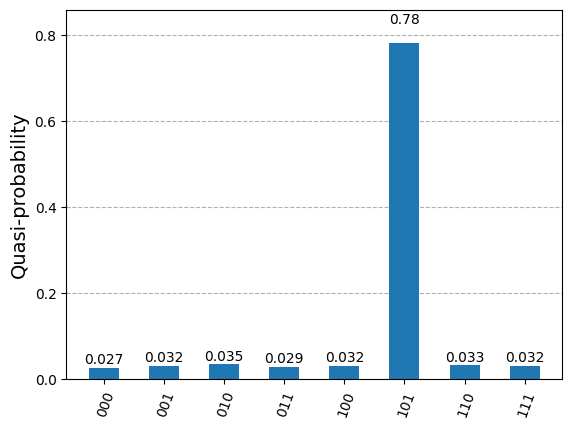

In [ ]:
measurement= Sampler().run(f, shots=10000).result().quasi_dists[0].binary_probabilities()
display(plot_histogram(measurement))

# Searching for |101⟩ + |010⟩

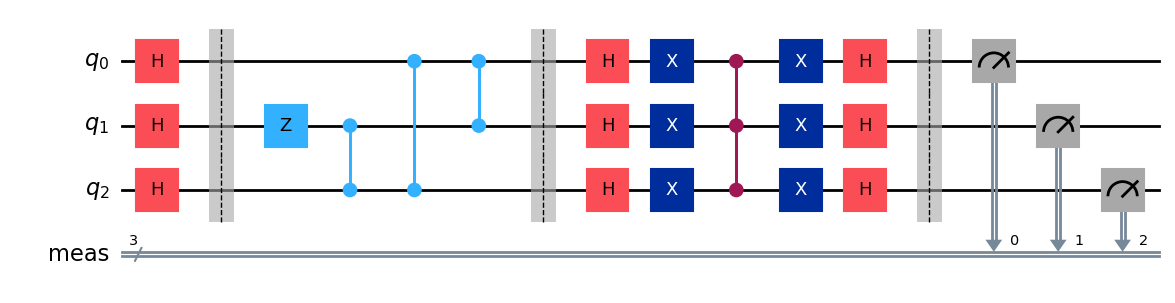

In [ ]:
n=3

f = QuantumCircuit(n)

f.h(range(n))
f.barrier()

# oracle

f.z(1)
f.cz(2,1)

f.cz(2,0)
f.cz(1,0)

f.barrier()

#amplifier
f.h(range(n))
f.x(range(n))

f.ccz(2,1,0)

f.x(range(n))
f.h(range(n))


f.measure_all()


display(f.draw('mpl'))

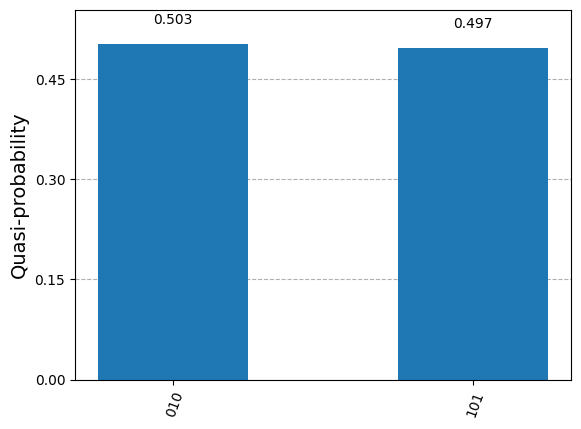

In [ ]:
measurement= Sampler().run(f, shots=1000).result().quasi_dists[0].binary_probabilities()
display(plot_histogram(measurement))

# Searching for |1001⟩

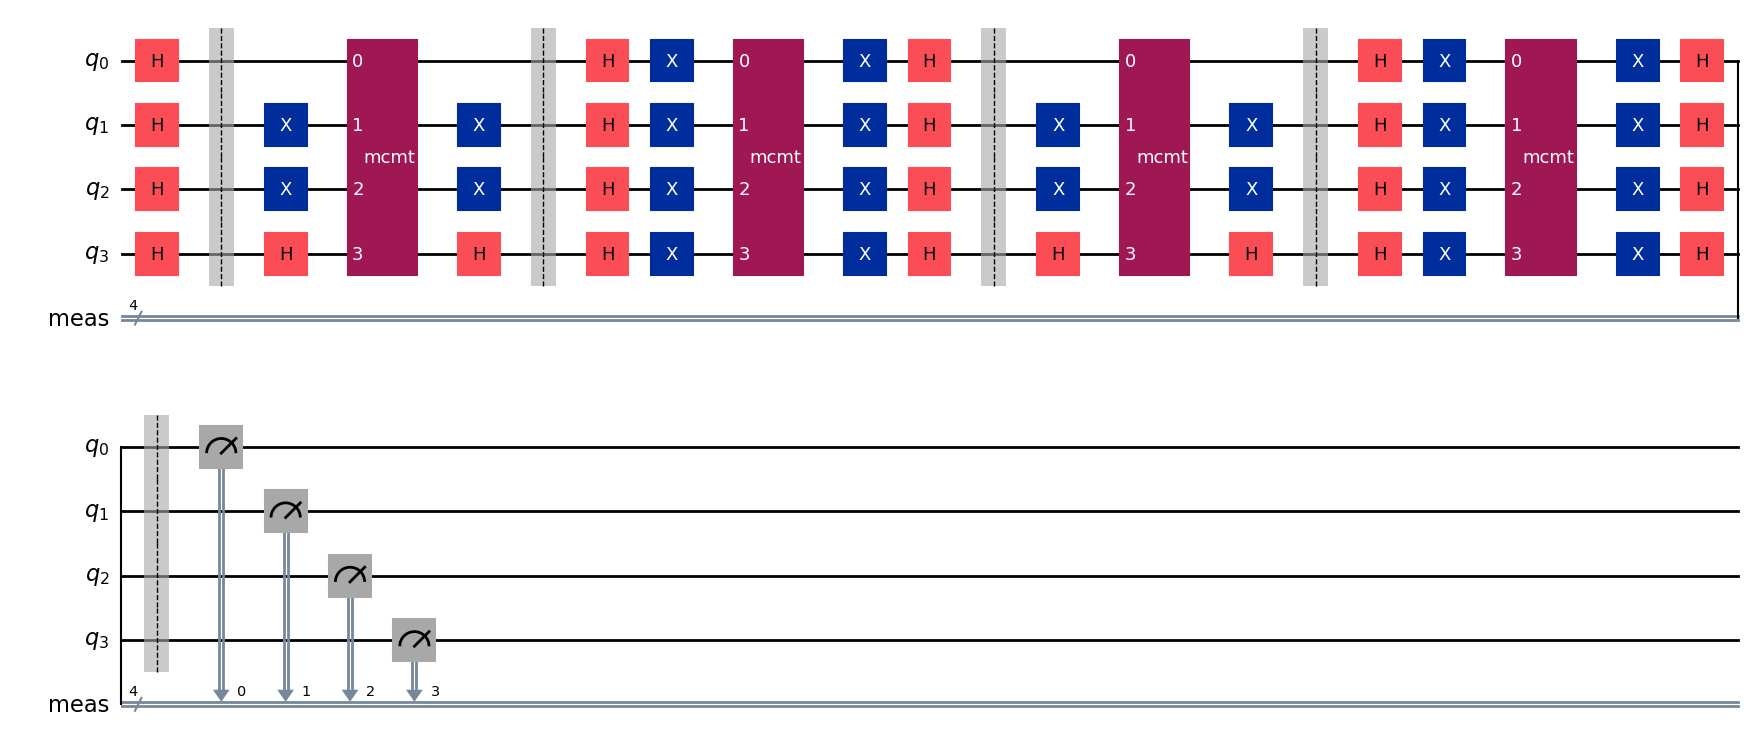

In [ ]:
n=4

f = QuantumCircuit(n)
f.h(range(n))
f.barrier()

# oracle

f.x([1,2])
f.h(3)

f.append(MCMT('x',3,1),[0,1,2,3])

f.x([1,2])
f.h(3)

f.barrier()
#amplifier
f.h(range(n))
f.x(range(n))

f.append(MCMT('z',3,1),[0,1,2,3])

f.x(range(n))
f.h(range(n))




f.barrier()




# oracle

f.x([1,2])
f.h(3)

f.append(MCMT('x',3,1),[0,1,2,3])

f.x([1,2])
f.h(3)

f.barrier()
#amplifier
f.h(range(n))
f.x(range(n))

f.append(MCMT('z',3,1),[0,1,2,3])

f.x(range(n))
f.h(range(n))

f.measure_all()
display(f.draw('mpl'))


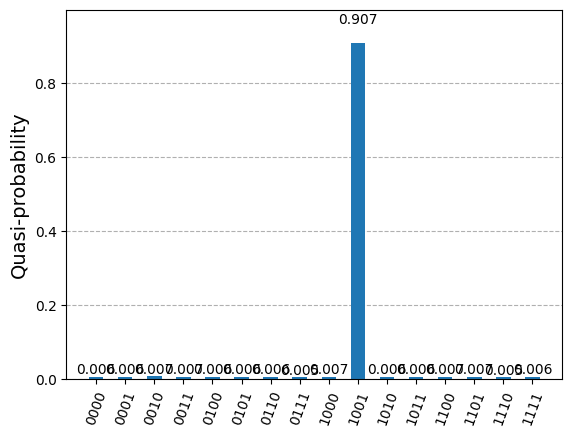

In [ ]:
measurement= Sampler().run(f, shots=10000).result().quasi_dists[0].binary_probabilities()
display(plot_histogram(measurement))

# Comparison for probability of finding string depending on number of repetitions of oracle and amplifier

In [ ]:
def four_bit_circuit(reps):
  n=4
  f = QuantumCircuit(n)
  f.h(range(n))
  f.barrier()

  for i in range(reps):
    f.x([1,2])
    f.h(3)

    f.append(MCMT('x',3,1),[0,1,2,3])

    f.x([1,2])
    f.h(3)

    f.h(range(n))
    f.x(range(n))

    f.append(MCMT('z',3,1),[0,1,2,3])

    f.x(range(n))
    f.h(range(n))

  f.measure_all()
  return f


def measure_four_bit_circuit(reps):
  f = four_bit_circuit(reps)
  measurement= Sampler().run(f, shots=10000).result().quasi_dists[0].binary_probabilities()
  return max(measurement.values())


def calc_prob(reps):
  num_reps = np.linspace(1,reps,reps)
  probabilities = np.zeros(reps)

  for i in range(reps):
    probabilities[i] = measure_four_bit_circuit(i+1)

  plt.plot(num_reps,probabilities,'k.--')
  plt.ylabel('probability')
  plt.xlabel('number of repetitions')

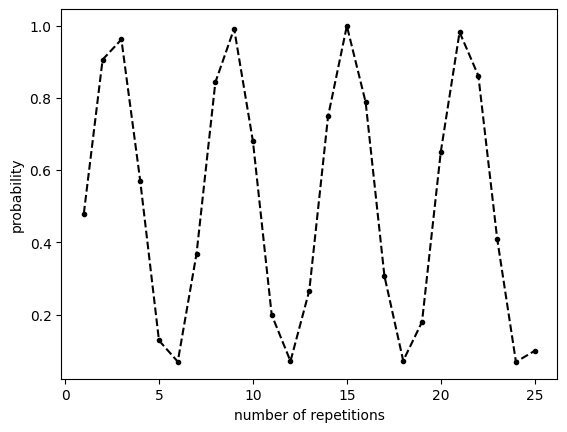

In [ ]:
calc_prob(25)

In [ ]:
np.pi/4*np.sqrt(2**4)
#peaks correspond with 2n+1 multiples of this value

3.141592653589793

#Grover op

https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.GroverOperator


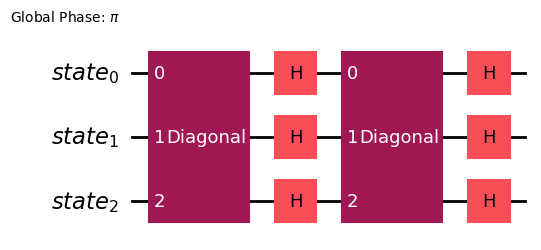

In [ ]:
f = QuantumCircuit(3)

f.h(range(3))

mark_state = Statevector.from_label('011')
diffuse_operator = 2 * DensityMatrix.from_label('000') - Operator.from_label('III')
grover_op = GroverOperator(oracle=mark_state, zero_reflection=diffuse_operator)
display(grover_op.decompose().draw('mpl',fold=70))

f.append(grover_op, range(3))
f.measure_all()

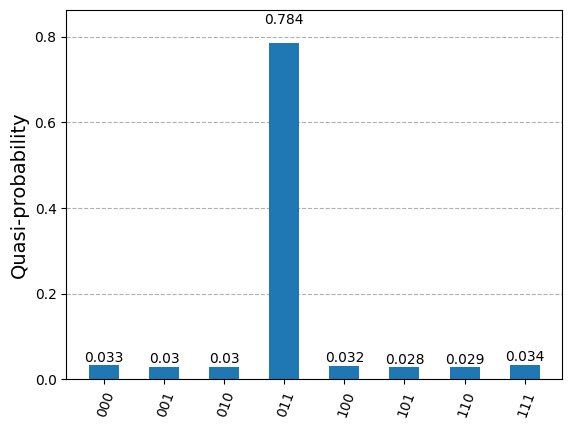

In [ ]:
measurement= Sampler().run(f, shots=1000).result().quasi_dists[0].binary_probabilities()
display(plot_histogram(measurement))